# Exploring features

In [1]:
import pandas as pd
import datetime
import rasterio
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, MultiPolygon

from damage.features import RasterSplitter

def plot_image(image):
    fix, ax = plt.subplots(figsize=(25, 25))
    ax.imshow(image)
    return ax

In [2]:
#cities = ['aleppo', 'damascus', 'daraa', 'idlib', 'homs', 'hama', 'raqqa']
#cities = ['deir-ez-zor', 'homs', 'hama', 'daraa', 'idlib', 'raqqa', 'aleppo']
cities = ['aleppo']
targets = []
for city in cities:
    try:
        targets.append(pd.read_pickle(f'../logs/features/target_{city}.p'))
    except Exception as e:
        print(e)

targets = pd.concat(targets)

In [3]:
targets.head()

destroyed  latitude  longitude  no_analysis
city   patch_id    date                                                   
aleppo 10016-10016 2011-06-26        0.0       NaN        NaN          NaN
                   2013-05-26        0.0  36.21351   37.12023          0.0
                   2013-09-23        0.0  36.21351   37.12023          0.0
                   2013-10-31        0.0  36.21351   37.12023          0.0
                   2014-01-31        0.0  36.21351   37.12023          0.0

In [4]:
targets['no_analysis'].value_counts()

0.0    1661588
1.0     157586
Name: no_analysis, dtype: int64

In [76]:
targets.groupby('city').count().sort_values('destroyed', ascending=False)

destroyed  latitude  longitude
city                                  
aleppo    1482029   1661588    1661588

In [77]:
targets.groupby(['city']).count()

destroyed  latitude  longitude
city                                  
aleppo    1482029   1661588    1661588

In [78]:
for col in ['SensDt',  'SensDt_2','SensDt_3','SensDt_4']:
    print(annotations[col].unique())

[None '2013-09-23']
['2014-05-23' None]
['2015-04-26' None '2015-05-01']
['2016-09-18']


In [79]:
for i in range(2, 5):
    print(annotations.loc[annotations[f'SensDt_{i}'].notnull()][f'DmgCls_{i}'].value_counts())

Severe Damage      4355
Moderate Damage    1871
Destroyed          1450
Name: DmgCls_2, dtype: int64
Severe Damage        6273
Moderate Damage      3749
Destroyed            2538
No Visible Damage      16
Name: DmgCls_3, dtype: int64
Moderate Damage      16269
Severe Damage        14680
Destroyed             4773
No Visible Damage      214
Name: DmgCls_4, dtype: int64


In [80]:
targets.groupby('date').sum()

destroyed      latitude     longitude
date                                             
2011-06-26        0.0  0.000000e+00  0.000000e+00
2013-05-26        0.0  3.166136e+06  3.248937e+06
2013-09-23      103.0  3.166136e+06  3.248937e+06
2013-10-31      103.0  3.166136e+06  3.248937e+06
2014-01-31      103.0  3.166136e+06  3.248937e+06
2014-07-14      834.0  3.166136e+06  3.248937e+06
2014-10-22      834.0  3.166136e+06  3.248937e+06
2014-12-15      834.0  3.166136e+06  3.248937e+06
2015-10-26     1340.0  3.166136e+06  3.248937e+06
2015-11-22     1340.0  3.166136e+06  3.248937e+06
2015-12-11     1340.0  3.166136e+06  3.248937e+06
2016-03-23     1340.0  3.166136e+06  3.248937e+06
2016-03-29     1340.0  3.166136e+06  3.248937e+06
2016-04-06     1340.0  3.166136e+06  3.248937e+06
2016-07-09     1340.0  3.166136e+06  3.248937e+06
2016-08-03     1340.0  3.166136e+06  3.248937e+06
2016-09-18     2470.0  3.166136e+06  3.248937e+06
2016-10-19     2470.0  3.166136e+06  3.248937e+06
2016-11-03     2470.0  3.166136e+06  3.248937e+06
2017-02-20     2470.0  3.166136e+06  3.248937e+06

In [81]:
targets.groupby('date').mean()

destroyed   latitude  longitude
date                                       
2011-06-26   0.000000        NaN        NaN
2013-05-26   0.000000  36.204267   37.15109
2013-09-23   0.001178  36.204267   37.15109
2013-10-31   0.001187  36.204267   37.15109
2014-01-31   0.001187  36.204267   37.15109
2014-07-14   0.009589  36.204267   37.15109
2014-10-22   0.009589  36.204267   37.15109
2014-12-15   0.009589  36.204267   37.15109
2015-10-26   0.015523  36.204267   37.15109
2015-11-22   0.015523  36.204267   37.15109
2015-12-11   0.015523  36.204267   37.15109
2016-03-23   0.015523  36.204267   37.15109
2016-03-29   0.015523  36.204267   37.15109
2016-04-06   0.015523  36.204267   37.15109
2016-07-09   0.015523  36.204267   37.15109
2016-08-03   0.015523  36.204267   37.15109
2016-09-18   0.028244  36.204267   37.15109
2016-10-19   1.000000  36.204267   37.15109
2016-11-03   1.000000  36.204267   37.15109
2017-02-20   1.000000  36.204267   37.15109

In [71]:
targets.tail()

destroyed   latitude  longitude
city   patch_id  date                                       
aleppo 9952-9952 2016-08-03        0.0  36.213853  37.119887
                 2016-09-18        0.0  36.213853  37.119887
                 2016-10-19        0.0  36.213853  37.119887
                 2016-11-03        0.0  36.213853  37.119887
                 2017-02-20        0.0  36.213853  37.119887

In [68]:
tp = pd.read_csv('../target_and_predictions_cleaned.csv')

In [70]:
tp.groupby('date')['destroyed'].mean()

date
2013-05-26         NaN
2013-09-23    0.001178
2013-10-31    0.001206
2014-01-31    0.001206
2014-07-14    0.009508
2014-10-22    0.009508
2014-12-15    0.009508
2015-10-26    0.015281
2015-11-22    0.015281
2015-12-11    0.015281
2016-03-23    0.015281
2016-03-29    0.015281
2016-04-06    0.015281
2016-07-09    0.015281
2016-08-03    0.015281
2016-09-18    0.027478
2016-10-19    1.000000
2016-11-03    1.000000
2017-02-20    1.000000
Name: destroyed, dtype: float64

In [58]:
targets['destroyed'].mean()

0.006397725457477018

In [55]:
targets.head()

destroyed  latitude  longitude
city   patch_id    date                                      
aleppo 10016-10016 2011-06-26        0.0       NaN        NaN
                   2013-09-23        0.0  36.21351   37.12023
                   2013-10-31        0.0  36.21351   37.12023
                   2014-01-31        0.0  36.21351   37.12023
                   2014-07-14        0.0  36.21351   37.12023

In [37]:
targets.groupby(['city', 'date'])['destroyed'].mean()

city    date      
aleppo  2011-06-26    0.000000
        2013-05-26    0.000000
        2013-09-23    0.001178
        2013-10-31    0.001210
        2014-01-31    0.001210
        2014-07-14    0.001210
        2014-10-22    0.001210
        2014-12-15    0.001210
        2015-10-26    0.001210
        2015-11-22    0.001210
        2015-12-11    0.001210
        2016-03-23    0.001210
        2016-03-29    0.001210
        2016-04-06    0.001210
        2016-07-09    0.001210
        2016-08-03    0.001210
        2016-09-18    0.027707
        2016-10-19    1.000000
        2016-11-03    1.000000
        2017-02-20    1.000000
Name: destroyed, dtype: float64

In [7]:
target_and_predictions = pd.read_csv('../target_and_predictions_cleaned.csv')

In [8]:
target_and_predictions.head()

city     patch_id        date  prediction  destroyed   latitude  \
0  aleppo  10016-10016  2013-05-26    0.552888        NaN  36.213509   
1  aleppo  10016-10016  2013-09-23    0.552888        0.0  36.213509   
2  aleppo  10016-10016  2013-10-31    0.684035        0.0  36.213509   
3  aleppo  10016-10016  2014-01-31    0.643709        0.0  36.213509   
4  aleppo  10016-10016  2014-07-14    0.894707        0.0  36.213509   

   longitude  date_stat  wave  destroyed_fp  ...  wave_10  wave_11  wave_12  \
0  37.120232      19504     1           0.0  ...        0        0        0   
1  37.120232      19624     2           0.0  ...        0        0        0   
2  37.120232      19662     3           0.0  ...        0        0        0   
3  37.120232      19754     4           0.0  ...        0        0        0   
4  37.120232      19918     5           0.0  ...        0        0        0   

   wave_13  wave_14  wave_15  wave_16  wave_17  wave_18  wave_19  
0        0        0        0        0        0        0        0  
1        0        0        0        0        0        0        0  
2        0        0        0        0        0        0        0  
3        0        0        0        0        0        0        0  
4        0        0        0        0        0        0        0  

[5 rows x 42 columns]

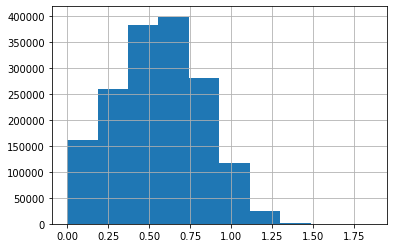

In [15]:
target_and_predictions['prediction'].hist()

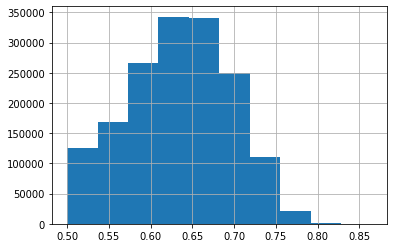

In [14]:
from sklearn.metrics import roc_auc_score

import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(target_and_predictions['prediction']).hist()

In [19]:
target_and_predictions['destroyed'].head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: destroyed, dtype: float64

In [22]:
target_and_predictions['destroyed'].unique()

array([nan,  0.,  1.])

In [25]:
target_and_predictions.dropna(subset=['destroyed']).groupby('date')['destroyed'].unique()

date
2013-09-23    [0.0, 1.0]
2013-10-31    [0.0, 1.0]
2014-01-31    [0.0, 1.0]
2014-07-14    [0.0, 1.0]
2014-10-22    [0.0, 1.0]
2014-12-15    [0.0, 1.0]
2015-10-26    [0.0, 1.0]
2015-11-22    [0.0, 1.0]
2015-12-11    [0.0, 1.0]
2016-03-23    [0.0, 1.0]
2016-03-29    [0.0, 1.0]
2016-04-06    [0.0, 1.0]
2016-07-09    [0.0, 1.0]
2016-08-03    [0.0, 1.0]
2016-09-18    [0.0, 1.0]
2016-10-19         [1.0]
2016-11-03         [1.0]
2017-02-20         [1.0]
Name: destroyed, dtype: object

In [27]:
target_and_predictions.dropna(subset=['destroyed']).groupby('date').apply(
    lambda x: np.nan if np.mean(x['destroyed'] == 1) == 1 else np.mean(roc_auc_score(x['destroyed'], x['prediction'].clip(0, 1)))
)

date
2013-09-23    0.821593
2013-10-31    0.818819
2014-01-31    0.785261
2014-07-14    0.834383
2014-10-22    0.853103
2014-12-15    0.849599
2015-10-26    0.806746
2015-11-22    0.829543
2015-12-11    0.838087
2016-03-23    0.850593
2016-03-29    0.840511
2016-04-06    0.804773
2016-07-09    0.834255
2016-08-03    0.836077
2016-09-18    0.821215
2016-10-19         NaN
2016-11-03         NaN
2017-02-20         NaN
dtype: float64

In [40]:
target_and_predictions['date'] = pd.to_datetime(target_and_predictions['date'])
targets = target_and_predictions.set_index(['city', 'patch_id', 'date'])
targets.head()

prediction  destroyed   latitude  longitude  \
city   patch_id    date                                                      
aleppo 10016-10016 2013-05-26    0.552888        NaN  36.213509  37.120232   
                   2013-09-23    0.552888        0.0  36.213509  37.120232   
                   2013-10-31    0.684035        0.0  36.213509  37.120232   
                   2014-01-31    0.643709        0.0  36.213509  37.120232   
                   2014-07-14    0.894707        0.0  36.213509  37.120232   

                               date_stat  wave  destroyed_fp  pred_binary  \
city   patch_id    date                                                     
aleppo 10016-10016 2013-05-26      19504     1           0.0          0.0   
                   2013-09-23      19624     2           0.0          0.0   
                   2013-10-31      19662     3           0.0          0.0   
                   2014-01-31      19754     4           0.0          0.0   
                   2014-07-14      19918     5           0.0          0.0   

                               prediction_best  prediction_varc  ...  wave_10  \
city   patch_id    date                                          ...            
aleppo 10016-10016 2013-05-26                0                0  ...        0   
                   2013-09-23                0                0  ...        0   
                   2013-10-31                0                0  ...        0   
                   2014-01-31                0                0  ...        0   
                   2014-07-14                0                0  ...        0   

                               wave_11  wave_12  wave_13  wave_14  wave_15  \
city   patch_id    date                                                      
aleppo 10016-10016 2013-05-26        0        0        0        0        0   
                   2013-09-23        0        0        0        0        0   
                   2013-10-31        0        0        0        0        0   
                   2014-01-31        0        0        0        0        0   
                   2014-07-14        0        0        0        0        0   

                               wave_16  wave_17  wave_18  wave_19  
city   patch_id    date                                            
aleppo 10016-10016 2013-05-26        0        0        0        0  
                   2013-09-23        0        0        0        0  
                   2013-10-31        0        0        0        0  
                   2014-01-31        0        0        0        0  
                   2014-07-14        0        0        0        0  

[5 rows x 39 columns]

In [7]:
city = 'aleppo'
date = '2016-03-23'
no_analysis_path = f'../data/polygons/5_No_Analysis_Areas_{city.capitalize()}.shp'
raster_path = f'../data/city_rasters/{city}_{date.replace("-", "_")}_zoom_19.tif'
annotations_path = f'../data/annotations/6_Damage_Sites_{city.capitalize()}_SDA.shp'

In [8]:
raster = rasterio.open(raster_path)
raster_array = RasterSplitter._raster_to_array(raster)
populated = gpd.read_file('../data/polygons/populated_areas.shp')
populated = populated.loc[populated['ADM3_EN'].apply(lambda x: False if x is None else city in x.lower())]
populated_multipolygon = MultiPolygon(populated['geometry'].tolist())
no_analysis = gpd.read_file(no_analysis_path)
no_analysis_multipolygon = MultiPolygon(no_analysis['geometry'].tolist())
annotations = gpd.read_file(annotations_path)

In [ ]:
annot

In [14]:
annotations['SensDt_4'].unique()

array(['2016-09-18'], dtype=object)

In [30]:
def coordinate_multipolygon_to_raster_pixels(multipolygon, raster):
    polygons_pixels = []
    for polygon in multipolygon.geoms:
        try:
            coordinates = pd.DataFrame([{'latitude': latitude, 'longitude': longitude} for longitude, latitude in polygon.exterior.coords])
        except ValueError:
            coordinates = pd.DataFrame([{'latitude': latitude, 'longitude': longitude} for longitude, latitude, altitude in polygon.exterior.coords])
        rows, columns = raster.index(coordinates['longitude'], coordinates['latitude'])
        # PopulatedPoly (and no analysis polygon also) from Damage
        # can have vertices with negative coordinates in pixels so we need to
        # bound the polygon in pixels to be inside the image
        rows = np.minimum(np.maximum(rows, 0), raster.height-1)            
        columns = np.minimum(np.maximum(columns, 0), raster.width-1)
        polygon_pixels = Polygon(list(zip(columns, rows)))
        if polygon_pixels.area > 0:
            polygons_pixels.append(polygon_pixels)
            # this is to avoid potential problems later when we check
            # if a pixel is within a polygon or not

    return MultiPolygon(polygons_pixels)

In [31]:
populated_multipolygon_pixels = coordinate_multipolygon_to_raster_pixels(populated_multipolygon, raster)
no_analysis_multipolygon_pixels = coordinate_multipolygon_to_raster_pixels(no_analysis_multipolygon, raster)

In [37]:
targets.xs(city, level='city').head()

prediction  destroyed   latitude  longitude  \
patch_id    date                                                      
10016-10016 2013-05-26    0.552888        NaN  36.213509  37.120232   
            2013-09-23    0.552888        0.0  36.213509  37.120232   
            2013-10-31    0.684035        0.0  36.213509  37.120232   
            2014-01-31    0.643709        0.0  36.213509  37.120232   
            2014-07-14    0.894707        0.0  36.213509  37.120232   

                        date_stat  wave  destroyed_fp  pred_binary  \
patch_id    date                                                     
10016-10016 2013-05-26      19504     1           0.0          0.0   
            2013-09-23      19624     2           0.0          0.0   
            2013-10-31      19662     3           0.0          0.0   
            2014-01-31      19754     4           0.0          0.0   
            2014-07-14      19918     5           0.0          0.0   

                        prediction_best  prediction_varc  ...  wave_10  \
patch_id    date                                          ...            
10016-10016 2013-05-26                0                0  ...        0   
            2013-09-23                0                0  ...        0   
            2013-10-31                0                0  ...        0   
            2014-01-31                0                0  ...        0   
            2014-07-14                0                0  ...        0   

                        wave_11  wave_12  wave_13  wave_14  wave_15  wave_16  \
patch_id    date                                                               
10016-10016 2013-05-26        0        0        0        0        0        0   
            2013-09-23        0        0        0        0        0        0   
            2013-10-31        0        0        0        0        0        0   
            2014-01-31        0        0        0        0        0        0   
            2014-07-14        0        0        0        0        0        0   

                        wave_17  wave_18  wave_19  
patch_id    date                                   
10016-10016 2013-05-26        0        0        0  
            2013-09-23        0        0        0  
            2013-10-31        0        0        0  
            2014-01-31        0        0        0  
            2014-07-14        0        0        0  

[5 rows x 39 columns]

In [61]:
targets.head()

prediction  destroyed   latitude  longitude  \
city   patch_id    date                                                      
aleppo 10016-10016 2013-05-26    0.552888        NaN  36.213509  37.120232   
                   2013-09-23    0.552888        0.0  36.213509  37.120232   
                   2013-10-31    0.684035        0.0  36.213509  37.120232   
                   2014-01-31    0.643709        0.0  36.213509  37.120232   
                   2014-07-14    0.894707        0.0  36.213509  37.120232   

                               date_stat  wave  destroyed_fp  pred_binary  \
city   patch_id    date                                                     
aleppo 10016-10016 2013-05-26      19504     1           0.0          0.0   
                   2013-09-23      19624     2           0.0          0.0   
                   2013-10-31      19662     3           0.0          0.0   
                   2014-01-31      19754     4           0.0          0.0   
                   2014-07-14      19918     5           0.0          0.0   

                               prediction_best  prediction_varc  ...  wave_10  \
city   patch_id    date                                          ...            
aleppo 10016-10016 2013-05-26                0                0  ...        0   
                   2013-09-23                0                0  ...        0   
                   2013-10-31                0                0  ...        0   
                   2014-01-31                0                0  ...        0   
                   2014-07-14                0                0  ...        0   

                               wave_11  wave_12  wave_13  wave_14  wave_15  \
city   patch_id    date                                                      
aleppo 10016-10016 2013-05-26        0        0        0        0        0   
                   2013-09-23        0        0        0        0        0   
                   2013-10-31        0        0        0        0        0   
                   2014-01-31        0        0        0        0        0   
                   2014-07-14        0        0        0        0        0   

                               wave_16  wave_17  wave_18  wave_19  
city   patch_id    date                                            
aleppo 10016-10016 2013-05-26        0        0        0        0  
                   2013-09-23        0        0        0        0  
                   2013-10-31        0        0        0        0  
                   2014-01-31        0        0        0        0  
                   2014-07-14        0        0        0        0  

[5 rows x 39 columns]

In [58]:
target_single_date = targets.xs(city, level='city').xs(pd.to_datetime(date.replace('_', '-')), level='date')['destroyed']
target_destroyed = target_single_date.loc[target_single_date == 1]
target_non_destroyed = target_single_date.loc[target_single_date == 0]
patches_destroyed = pd.DataFrame([elem.split('-') for elem in target_destroyed.index.tolist()], columns=['row', 'column']).astype(int)
patches_non_destroyed = pd.DataFrame([elem.split('-') for elem in target_non_destroyed.index.tolist()], columns=['row', 'column']).astype(int)

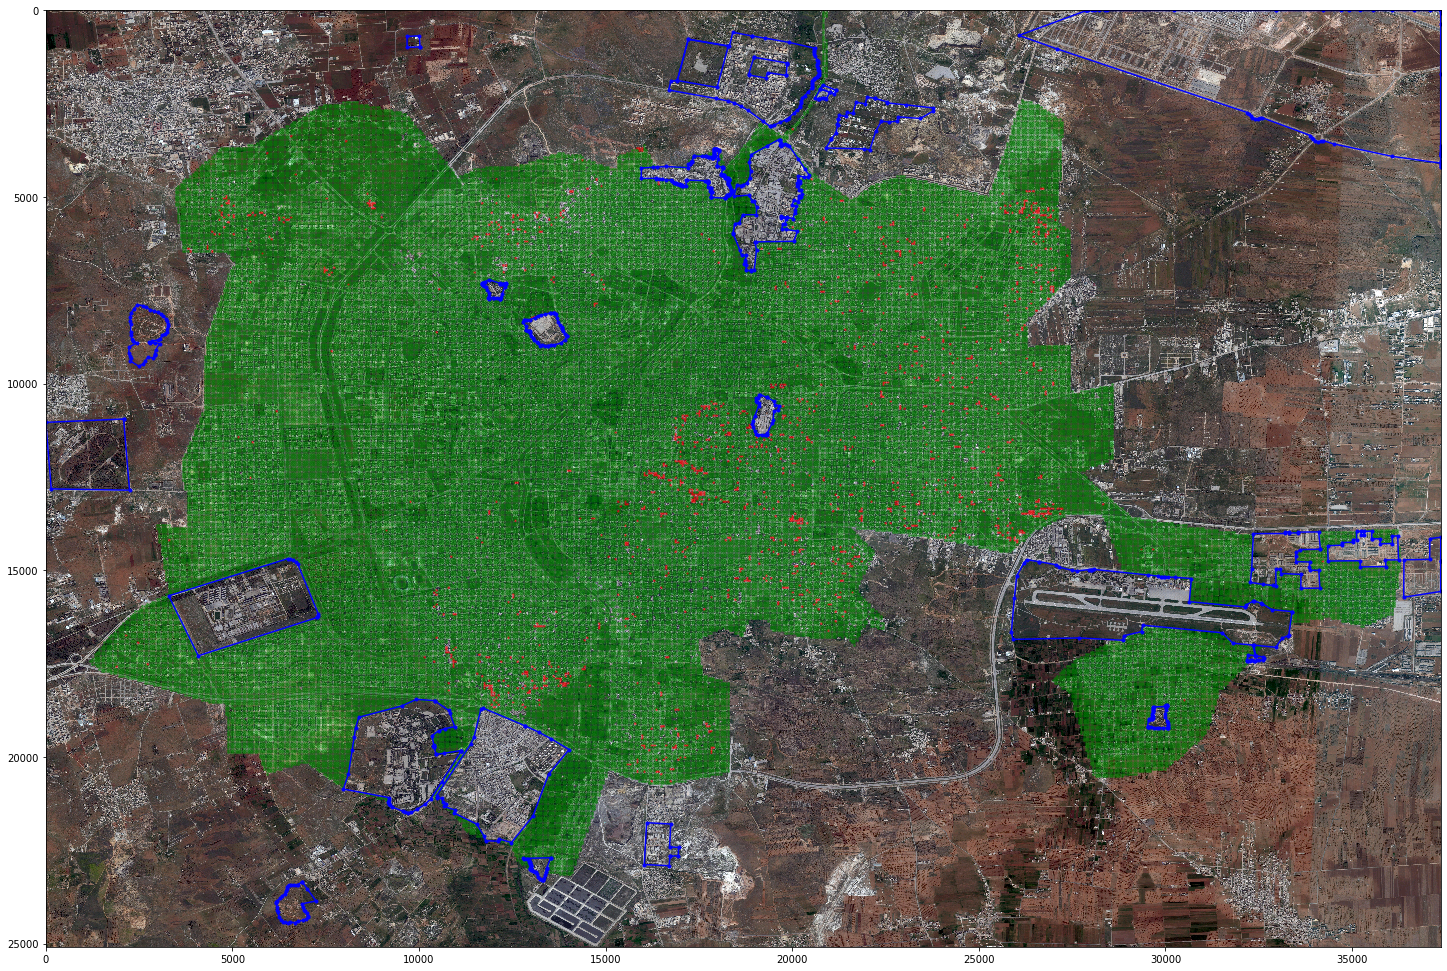

In [60]:
ax = plot_image(raster_array)
size = 3.5
alpha = 0.5 
for polygon in populated_multipolygon_pixels.geoms:
    coordinates = list(zip(*polygon.exterior.coords))
    columns = coordinates[0]
    rows = coordinates[1]
    ax.plot(columns, rows, 'y.-', label='populated areas')
    
for polygon in no_analysis_multipolygon_pixels.geoms:
    coordinates = list(zip(*polygon.exterior.coords))
    columns = coordinates[0]
    rows = coordinates[1]
    ax.plot(columns, rows, 'b.-', label='no-analysis areas')

ax.scatter(patches_destroyed['row'], patches_destroyed['column'], color='r', label='destroyed', alpha=alpha, s=size)
ax.scatter(patches_non_destroyed['row'], patches_non_destroyed['column'], color='g', label='non-destroyed', alpha=alpha, s=size)
plt.savefig('../figures/destruction_heatmap.pdf', dpi=250)

In [50]:
prediction_single_date = targets.xs(city, level='city').xs(pd.to_datetime(date.replace('_', '-')), level='date')
patches = pd.DataFrame([elem.split('-') for elem in prediction_single_date.index.tolist()], columns=['row', 'column']).astype(int)

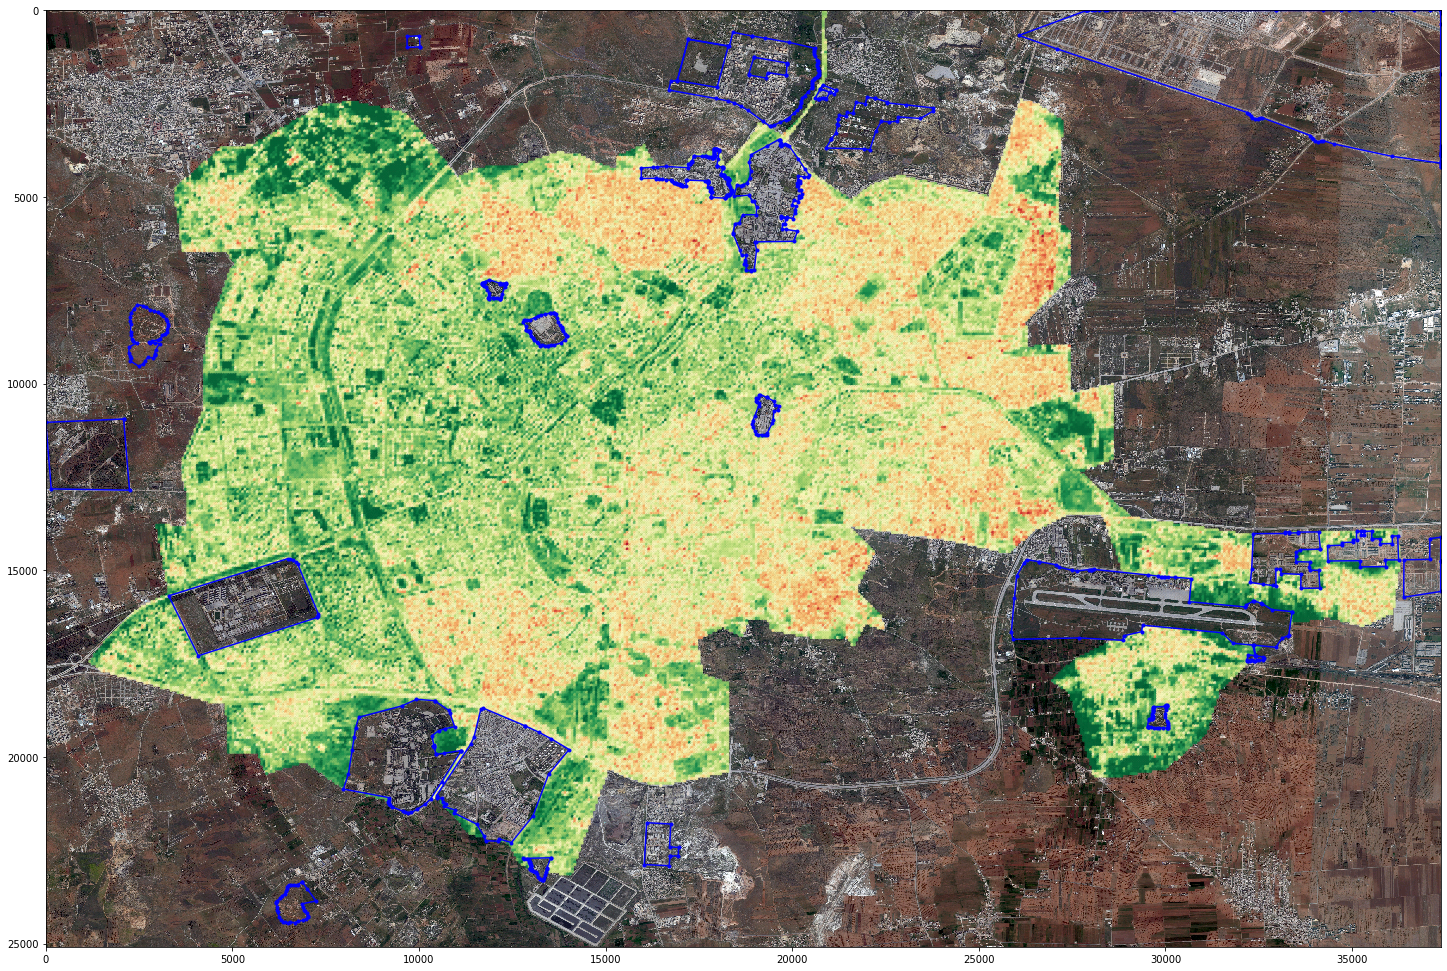

In [57]:
ax = plot_image(raster_array)
size = 5.5
alpha = 0.8 
for polygon in populated_multipolygon_pixels.geoms:
    coordinates = list(zip(*polygon.exterior.coords))
    columns = coordinates[0]
    rows = coordinates[1]
    ax.plot(columns, rows, 'y.-', label='populated areas')
    
for polygon in no_analysis_multipolygon_pixels.geoms:
    coordinates = list(zip(*polygon.exterior.coords))
    columns = coordinates[0]
    rows = coordinates[1]
    ax.plot(columns, rows, 'b.-', label='no-analysis areas')

ax.scatter(patches['row'], patches['column'], c=prediction_single_date['prediction'], alpha=alpha, s=size, cmap='RdYlGn_r')
plt.savefig('../figures/predicted_destruction_heatmap.pdf', dpi=250)

# Test set

In [88]:
import pandas as pd
test_set = pd.read_pickle('../logs/predictions/test_set_1568278667.p')
print(test_set.shape)
test_set.head()

(343471, 6)


annotation_date  damage_num  destroyed  \
city   patch_id    date                                                
aleppo 10016-10080 2013-09-23             NaN         0.0        0.0   
                   2013-10-31             NaN         0.0        0.0   
                   2014-05-23             NaN         0.0        0.0   
                   2014-07-14             NaN         0.0        0.0   
                   2014-10-22             NaN         0.0        0.0   

                                latitude  longitude  prediction  
city   patch_id    date                                          
aleppo 10016-10080 2013-09-23  36.213166   37.12023    0.140562  
                   2013-10-31  36.213166   37.12023    0.362565  
                   2014-05-23  36.213166   37.12023    0.431391  
                   2014-07-14  36.213166   37.12023    0.591559  
                   2014-10-22  36.213166   37.12023    0.499213

In [89]:
test_set.groupby(['city', 'date'])['destroyed'].mean()

city    date      
aleppo  2013-09-23    0.001147
        2013-10-31    0.001157
        2014-05-23    0.009862
        2014-07-14    0.010020
        2014-10-22    0.010020
        2014-12-15    0.010020
        2015-10-26    0.017094
        2015-11-22    0.017094
        2016-03-23    0.017094
        2016-03-29    0.017094
        2016-09-18    0.028555
        2016-10-19    0.169927
daraa   2013-11-10    0.001917
        2014-05-01    0.002156
        2016-02-25    0.008875
        2016-04-19    0.010541
        2016-12-05    0.168582
        2017-02-07    0.168582
        2017-06-02    0.168582
        2017-10-03    0.168582
hama    2013-10-31    0.029864
        2014-04-03    0.031275
        2016-06-30    0.011828
        2016-07-29    0.629717
idlib   2014-02-07    0.005389
        2014-05-31    0.009535
        2015-08-19    0.011876
        2016-06-01    0.011876
        2016-08-01    0.020035
        2017-02-21    0.171717
        2017-07-17    0.171717
Name: destroyed, dty

In [90]:
test_set.groupby(['city', 'date'])['prediction'].mean()

city    date      
aleppo  2013-09-23    0.254005
        2013-10-31    0.279748
        2014-05-23    0.281123
        2014-07-14    0.409244
        2014-10-22    0.300243
        2014-12-15    0.300196
        2015-10-26    0.329884
        2015-11-22    0.315734
        2016-03-23    0.259997
        2016-03-29    0.262611
        2016-09-18    0.389243
        2016-10-19    0.634358
daraa   2013-11-10    0.266393
        2014-05-01    0.240270
        2016-02-25    0.286730
        2016-04-19    0.280889
        2016-12-05    0.365666
        2017-02-07    0.485724
        2017-06-02    0.522348
        2017-10-03    0.408979
hama    2013-10-31    0.431025
        2014-04-03    0.408949
        2016-06-30    0.437276
        2016-07-29    0.751419
idlib   2014-02-07    0.291877
        2014-05-31    0.468733
        2015-08-19    0.315293
        2016-06-01    0.325944
        2016-08-01    0.291429
        2017-02-21    0.354413
        2017-07-17    0.354723
Name: prediction, dt

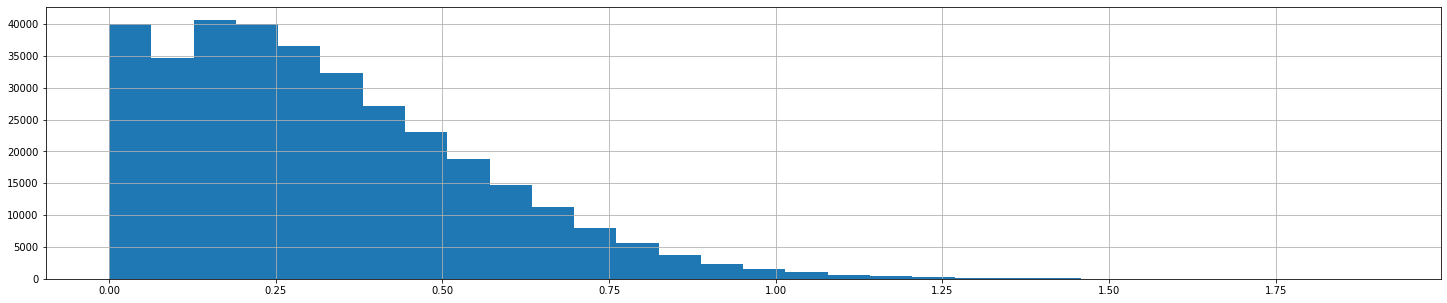

In [91]:
test_set['prediction'].hist(figsize=(25, 5), bins=30)

In [92]:
(test_set['destroyed'] == test_set['prediction'].round()).mean()

0.7972230552215471

In [93]:
recalls = []
precisions =  []
for i in range(len(test_set)//200):
    _test_set = test_set.iloc[(i*200):(i+1)*200]
    recall = _test_set.loc[_test_set['destroyed'] == 1, 'prediction'].round().mean()
    precision = _test_set.loc[_test_set['prediction'].round() == 1, 'destroyed'].mean()
    if recall != recall:
        continue
        
    recalls.append(recall)
    if precision != precision:
        continue
    precisions.append(precision)

In [94]:
print(f'Batch-wise recall: {sum(recalls)/len(recalls)}')
print(f'Overall recall: {(test_set.loc[test_set.destroyed == 1].prediction).round().mean()}')
print(f'Batch-wise precision: {sum(precisions)/len(precisions)}')
print(f'Overall precision: {test_set.loc[test_set.prediction.round() == 1].destroyed.mean()}')

Batch-wise recall: 0.6669580449625885
Overall recall: 0.6592618227005005
Batch-wise precision: 0.12946150852385835
Overall precision: 0.05164286315553186


In [21]:
test_set.to_csv('../figures/figures_to_send/2019_09_07/test_set.csv')